# A section title

In [1]:
%%capture

from auviewer.server import *
environment = 'lab'
if environment == 'local':
    setDataPath('/home/gwelter/data/med_local')
    p = loadProject(2)
elif environment == 'lab':
    setDataPath('/home/auvdata')
    p = loadProject(1)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [14]:
#individualAnnotationSets = [10,15]+[*range(16,22)]+[*range(28,34)]
individualAnnotationSets = [*range(28,34)]
individualAnnotationSets

[28, 29, 30, 31, 32, 33]

In [15]:
display(p.getAnnotations(pattern_set_id=individualAnnotationSets))

,file_id,filename,user_id,user_email,user_firstname,user_lastname,pattern_set_id,pattern_id,series,left,right,top,bottom,label,created,pattern_identifier
0,44,20191112_1903642_1927237.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14804,/data/numerics/SpO₂.SpO₂:value,1.530316e+09,1.530317e+09,None,None,"{""confidence"":""-1"",""notes"":""I lean towards art...",2020-09-29 22:04:47,1_44_/data/numerics/SpO₂.SpO₂:value_1530316251...
1,29,20190523_1143071_1740434.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14805,/data/numerics/SpO₂T.SpO₂T:value,1.500648e+09,1.500649e+09,None,None,"{""confidence"":""3"",""notes"":""I think real the ec...",2020-09-29 22:07:05,1_29_/data/numerics/SpO₂T.SpO₂T:value_15006481...
2,7,20190523_1369811_1829132.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14806,/data/numerics/SpO₂.SpO₂:value,1.509856e+09,1.509858e+09,None,None,"{""confidence"":""3"",""notes"":""I think real the ec...",2020-09-29 22:11:31,1_7_/data/numerics/SpO₂.SpO₂:value_1509855814....
3,51,20190523_1627175_1430807.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14807,/data/numerics/SpO₂.SpO₂:value,1.496045e+09,1.496045e+09,None,None,"{""confidence"":""3"",""notes"":""real the ecg and pl...",2020-09-29 22:15:30,1_51_/data/numerics/SpO₂.SpO₂:value_1496045186...
4,37,20190523_1707728_1792754.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14808,/data/numerics/SpO₂T.SpO₂T:value,1.490488e+09,1.490489e+09,None,None,"{""confidence"":""-3"",""notes"":""i think likely art...",2020-09-29 22:18:25,1_37_/data/numerics/SpO₂T.SpO₂T:value_14904883...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,34,20190805_1579325_1573490.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14880,/data/numerics/SpO₂.SpO₂:value,1.509380e+09,1.509381e+09,None,None,"{""confidence"":""-1"",""notes"":""pleth waveform qua...",2020-10-16 16:33:53,1_34_/data/numerics/SpO₂.SpO₂:value_1509380443...
201,23,20190805_1746688_1212931.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14881,/data/numerics/SpO₂.SpO₂:value,1.500293e+09,1.500293e+09,None,None,"{""confidence"":""3"",""notes"":""""}",2020-10-16 16:37:55,1_23_/data/numerics/SpO₂.SpO₂:value_1500292697...
202,26,20190805_1871139_1633671.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14882,/data/numerics/SpO₂.SpO₂:value,1.514014e+09,1.514014e+09,None,None,"{""confidence"":""3"",""notes"":""""}",2020-10-16 16:42:01,1_26_/data/numerics/SpO₂.SpO₂:value_1514013602...
203,45,20191112_1001456_1716760.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14883,/data/numerics/SpO₂T.SpO₂T:value,1.501160e+09,1.501161e+09,None,None,"{""confidence"":""3"",""notes"":""""}",2020-10-16 16:46:33,1_45_/data/numerics/SpO₂T.SpO₂T:value_15011602...


In [16]:
%%capture

a = p.getAnnotations(pattern_set_id=individualAnnotationSets)

# Rename the label column
a.rename(columns = {'label': 'annotation_label'}, inplace = True)
            
# Label Confidence Colummn
# Drop nan's (TODO: Need to have these annotations corrected)
a['label_confidence'] = a['annotation_label'].str.extract(r'^\{"confidence":"([^"]*)')
a['label_confidence'] = pd.to_numeric(a['label_confidence'], errors='coerce')
a = a.dropna(subset=['label_confidence'])
a['label_confidence'] = a['label_confidence'].astype(int)

# Label Notes Column
a['label_notes'] = a['annotation_label'].str.extract(r'"notes":"([^"]*)')

# Drop duplicates (from repeat clicking Create in the annotation window)
a = a.drop_duplicates(subset=('file_id', 'user_id', 'pattern_id', 'series', 'left', 'right'), ignore_index=True)

a.sort_values(by='pattern_identifier', inplace=True, ignore_index=True)

# Will hold absolute difference (for 2-annotation patterns) and classification per our adjudication process (1, 2, or 3)
a['abs_confidence_diff'] = np.nan
a['c_classification'] = np.nan
a['label'] = ''

# Classify into c1, c2, c3 per our adjudication process
def classify(row):
    pattern_annotations = a[a['pattern_identifier'] == row['pattern_identifier']]
    if pattern_annotations.shape[0] == 2:
        val0 = pattern_annotations.iloc[0]['label_confidence']
        val1 = pattern_annotations.iloc[1]['label_confidence']
        a.loc[a['pattern_identifier'] == row.loc['pattern_identifier'], 'abs_confidence_diff'] = abs(val0-val1)
        if val0 * val1 <= 0:
            a.loc[a['pattern_identifier'] == row.loc['pattern_identifier'], 'c_classification'] = 3
            a.loc[a['pattern_identifier'] == row.loc['pattern_identifier'], 'label'] = f"{pattern_annotations.iloc[0]['user_email']}\n{pattern_annotations.iloc[0]['annotation_label']}\n\n{pattern_annotations.iloc[1]['user_email']}\n{pattern_annotations.iloc[1]['annotation_label']}"
        elif val0 * val1 < 3:
            a.loc[a['pattern_identifier'] == row.loc['pattern_identifier'], 'c_classification'] = 2
        elif val0 * val1 >= 3:
            a.loc[a['pattern_identifier'] == row.loc['pattern_identifier'], 'c_classification'] = 1
    
a.apply(classify, axis=1);

In [17]:
display(a)

,file_id,filename,user_id,user_email,user_firstname,user_lastname,pattern_set_id,pattern_id,series,left,...,top,bottom,annotation_label,created,pattern_identifier,label_confidence,label_notes,abs_confidence_diff,c_classification,label
0,10,20190523_1628452_1284339.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15323,/data/numerics/HR.HR:value,1.524480e+09,...,None,None,"{""confidence"":""0"",""notes"":""""}",2020-10-06 15:38:38,1_10_/data/numerics/HR.HR:value_1524479512.506...,0,,NaN,NaN,
1,10,20190523_1628452_1284339.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15002,/data/numerics/RR.RR:value,1.524533e+09,...,None,None,"{""confidence"":""2"",""notes"":""probably real ecg s...",2020-10-01 13:07:23,1_10_/data/numerics/RR.RR:value_1524533342.906...,2,probably real ecg signal stable but no resp wa...,0.0,1.0,
2,10,20190523_1628452_1284339.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15137,/data/numerics/RR.RR:value,1.524533e+09,...,None,None,"{""confidence"":""2"",""notes"":""good ecg signal. L...",2020-10-06 14:56:37,1_10_/data/numerics/RR.RR:value_1524533342.906...,2,good ecg signal. Low RR is rarely a reason fo...,0.0,1.0,
3,10,20190523_1628452_1284339.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15158,/data/numerics/RR.RR:value,1.524628e+09,...,None,None,"{""confidence"":""2"",""notes"":""good ecg signal""}",2020-10-06 15:30:15,1_10_/data/numerics/RR.RR:value_1524627805.882...,2,good ecg signal,NaN,NaN,
4,11,20190523_1397747_1900167.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15193,/data/numerics/HR.HR:value,1.509772e+09,...,None,None,"{""confidence"":""3"",""notes"":""real corroborated b...",2020-10-01 18:36:01,1_11_/data/numerics/HR.HR:value_1509772441.697...,3,real corroborated by ecg wave frequency,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,7,20190523_1369811_1829132.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14821,/data/numerics/SpO₂.SpO₂:value,1.509861e+09,...,None,None,"{""confidence"":""3"",""notes"":""i think real. pleth...",2020-09-30 13:47:37,1_7_/data/numerics/SpO₂.SpO₂:value_1509860593....,3,i think real. pleth not awful. resp waves show...,0.0,1.0,
200,7,20190523_1369811_1829132.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,14973,/data/numerics/SpO₂.SpO₂:value,1.510305e+09,...,None,None,"{""confidence"":""2"",""notes"":""Initially real unti...",2020-10-06 14:42:16,1_7_/data/numerics/SpO₂.SpO₂:value_1510304815....,2,Initially real until 4:07:09 then some artifac...,1.0,1.0,
201,7,20190523_1369811_1829132.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14868,/data/numerics/SpO₂.SpO₂:value,1.510305e+09,...,None,None,"{""confidence"":""3"",""notes"":""""}",2020-10-16 13:17:51,1_7_/data/numerics/SpO₂.SpO₂:value_1510304815....,3,,1.0,1.0,
202,8,20190523_1133215_1572634.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15190,/data/numerics/HR.HR:value,1.531059e+09,...,None,None,"{""confidence"":""2"",""notes"":""real mostly corrobo...",2020-10-01 18:28:08,1_8_/data/numerics/HR.HR:value_1531059007.62_1...,2,real mostly corroborated by ecg wave frequency...,NaN,NaN,


In [24]:
a.value_counts(subset=['c_classification'])

c_classification
1.0                 98
3.0                 22
2.0                  6
dtype: int64

In [23]:
a[a['c_classification']==3]

,file_id,filename,user_id,user_email,user_firstname,user_lastname,pattern_set_id,pattern_id,series,left,...,top,bottom,annotation_label,created,pattern_identifier,label_confidence,label_notes,abs_confidence_diff,c_classification,label
31,17,20190805_1157669_1498169.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15146,/data/numerics/RR.RR:value,1.539927e+09,...,None,None,"{""confidence"":""2"",""notes"":""real alert but into...",2020-10-06 15:03:04,1_17_/data/numerics/RR.RR:value_1539926797.128...,2,real alert but into alert some minor transient...,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""re..."
32,17,20190805_1157669_1498169.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15011,/data/numerics/RR.RR:value,1.539927e+09,...,None,None,"{""confidence"":""-3"",""notes"":""artifact due to re...",2020-10-01 13:31:46,1_17_/data/numerics/RR.RR:value_1539926797.128...,-3,artifact due to resp wave signal height too sm...,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""re..."
38,23,20190805_1746688_1212931.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15339,/data/numerics/HR.HR:value,1.499447e+09,...,None,None,"{""confidence"":""-2"",""notes"":""""}",2020-10-06 15:48:40,1_23_/data/numerics/HR.HR:value_1499446638.17_...,-2,,4.0,3.0,"pinsky@pitt.edu\n{""confidence"":""-2"",""notes"":""""..."
39,23,20190805_1746688_1212931.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15174,/data/numerics/HR.HR:value,1.499447e+09,...,None,None,"{""confidence"":""2"",""notes"":""real corroborated b...",2020-10-01 17:26:00,1_23_/data/numerics/HR.HR:value_1499446638.17_...,2,real corroborated by ecg wave rate best seen i...,4.0,3.0,"pinsky@pitt.edu\n{""confidence"":""-2"",""notes"":""""..."
64,27,20190523_1628905_1778103.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15003,/data/numerics/RR.RR:value,1.527575e+09,...,None,None,"{""confidence"":""-1"",""notes"":""I am calling artif...",2020-10-01 13:13:07,1_27_/data/numerics/RR.RR:value_1527575330.44_...,-1,I am calling artifact due to the terrible inst...,4.0,3.0,"mhra@pitt.edu\n{""confidence"":""-1"",""notes"":""I a..."
65,27,20190523_1628905_1778103.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15138,/data/numerics/RR.RR:value,1.527575e+09,...,None,None,"{""confidence"":""3"",""notes"":""""}",2020-10-06 14:57:09,1_27_/data/numerics/RR.RR:value_1527575330.44_...,3,,4.0,3.0,"mhra@pitt.edu\n{""confidence"":""-1"",""notes"":""I a..."
78,29,20190523_1143071_1740434.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14866,/data/numerics/SpO₂T.SpO₂T:value,1.500650e+09,...,None,None,"{""confidence"":""1"",""notes"":""pleth T waveform is...",2020-10-16 11:49:30,1_29_/data/numerics/SpO₂T.SpO₂T:value_15006496...,1,"pleth T waveform is poor quality, thus less co...",4.0,3.0,"tdp20@pitt.edu\n{""confidence"":""1"",""notes"":""ple..."
79,29,20190523_1143071_1740434.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,14971,/data/numerics/SpO₂T.SpO₂T:value,1.500650e+09,...,None,None,"{""confidence"":""-3"",""notes"":""""}",2020-10-06 14:40:28,1_29_/data/numerics/SpO₂T.SpO₂T:value_15006496...,-3,,4.0,3.0,"tdp20@pitt.edu\n{""confidence"":""1"",""notes"":""ple..."
91,34,20190805_1579325_1573490.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15148,/data/numerics/RR.RR:value,1.506998e+09,...,None,None,"{""confidence"":""2"",""notes"":""this is intermitten...",2020-10-06 15:04:46,1_34_/data/numerics/RR.RR:value_1506998166.091...,2,this is intermittent apnea,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""th..."
92,34,20190805_1579325_1573490.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15013,/data/numerics/RR.RR:value,1.506998e+09,...,None,None,"{""confidence"":""-3"",""notes"":""artifact resp wave...",2020-10-01 13:37:49,1_34_/data/numerics/RR.RR:value_1506998166.091...,-3,artifact resp wave magnitude too low to captur...,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""th..."


Annotations: 204
Unique patterns: 141
Patterns with dual annotations: 78 patterns (156 annotations)
Pattern Counts by Adjudication Classification


1.0    49
2.0     3
3.0    11
Name: c_classification, dtype: int64

Pattern Counts by Absolute Difference:


0.0    29
1.0    22
2.0     3
4.0     5
5.0     3
6.0     1
Name: abs_confidence_diff, dtype: int64

<AxesSubplot:>

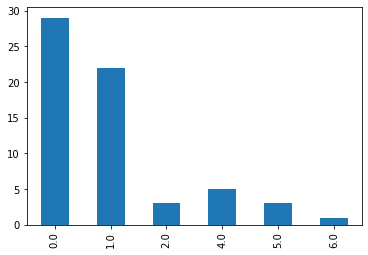

In [22]:
print(f'Annotations: {a.shape[0]}')
print(f"Unique patterns: {a['pattern_identifier'].drop_duplicates().shape[0]}")

pda = a['pattern_identifier'].value_counts().value_counts().iloc[0]
print(f"Patterns with dual annotations: {pda} patterns ({pda*2} annotations)")

print("Pattern Counts by Adjudication Classification")
display(a.drop_duplicates(subset='pattern_identifier')['c_classification'].value_counts().sort_index())

print('Pattern Counts by Absolute Difference:')
dc = a.drop_duplicates(subset='pattern_identifier')['abs_confidence_diff'].value_counts().sort_index()
display(dc)
display(dc.plot.bar())

In [25]:
# Create a pattern set
patternset = p.createPatternSet('Committee Adjudication 10/16/2020')

In [28]:
patternset.assignToUsers(2)

In [29]:
adjudicationPatterns = a[a['c_classification'] == 3].drop_duplicates(subset='pattern_identifier')
display(adjudicationPatterns)

,file_id,filename,user_id,user_email,user_firstname,user_lastname,pattern_set_id,pattern_id,series,left,...,top,bottom,annotation_label,created,pattern_identifier,label_confidence,label_notes,abs_confidence_diff,c_classification,label
31,17,20190805_1157669_1498169.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15146,/data/numerics/RR.RR:value,1.539927e+09,...,None,None,"{""confidence"":""2"",""notes"":""real alert but into...",2020-10-06 15:03:04,1_17_/data/numerics/RR.RR:value_1539926797.128...,2,real alert but into alert some minor transient...,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""re..."
38,23,20190805_1746688_1212931.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15339,/data/numerics/HR.HR:value,1.499447e+09,...,None,None,"{""confidence"":""-2"",""notes"":""""}",2020-10-06 15:48:40,1_23_/data/numerics/HR.HR:value_1499446638.17_...,-2,,4.0,3.0,"pinsky@pitt.edu\n{""confidence"":""-2"",""notes"":""""..."
64,27,20190523_1628905_1778103.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15003,/data/numerics/RR.RR:value,1.527575e+09,...,None,None,"{""confidence"":""-1"",""notes"":""I am calling artif...",2020-10-01 13:13:07,1_27_/data/numerics/RR.RR:value_1527575330.44_...,-1,I am calling artifact due to the terrible inst...,4.0,3.0,"mhra@pitt.edu\n{""confidence"":""-1"",""notes"":""I a..."
78,29,20190523_1143071_1740434.h5,12,tdp20@pitt.edu,Tiffany,Pellathy,30,14866,/data/numerics/SpO₂T.SpO₂T:value,1.500650e+09,...,None,None,"{""confidence"":""1"",""notes"":""pleth T waveform is...",2020-10-16 11:49:30,1_29_/data/numerics/SpO₂T.SpO₂T:value_15006496...,1,"pleth T waveform is poor quality, thus less co...",4.0,3.0,"tdp20@pitt.edu\n{""confidence"":""1"",""notes"":""ple..."
91,34,20190805_1579325_1573490.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,15148,/data/numerics/RR.RR:value,1.506998e+09,...,None,None,"{""confidence"":""2"",""notes"":""this is intermitten...",2020-10-06 15:04:46,1_34_/data/numerics/RR.RR:value_1506998166.091...,2,this is intermittent apnea,5.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""th..."
95,34,20190805_1579325_1573490.h5,6,pinsky@pitt.edu,Michael,Pinsky,33,14963,/data/numerics/SpO₂.SpO₂:value,1.508014e+09,...,None,None,"{""confidence"":""2"",""notes"":""""}",2020-10-06 14:33:08,1_34_/data/numerics/SpO₂.SpO₂:value_1508014035...,2,,4.0,3.0,"pinsky@pitt.edu\n{""confidence"":""2"",""notes"":""""}..."
109,37,20190523_1707728_1792754.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15005,/data/numerics/RR.RR:value,1.489917e+09,...,None,None,"{""confidence"":""-2"",""notes"":""hmm I am gong to c...",2020-10-01 13:19:57,1_37_/data/numerics/RR.RR:value_1489917281.901...,-2,hmm I am gong to call artifact because the RR ...,4.0,3.0,"mhra@pitt.edu\n{""confidence"":""-2"",""notes"":""hmm..."
134,45,20191112_1001456_1716760.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14830,/data/numerics/SpO₂.SpO₂:value,1.500909e+09,...,None,None,"{""confidence"":""-2"",""notes"":""hmmm. i think most...",2020-09-30 18:00:49,1_45_/data/numerics/SpO₂.SpO₂:value_1500908802...,-2,hmmm. i think mostly artifact as the leth sign...,5.0,3.0,"mhra@pitt.edu\n{""confidence"":""-2"",""notes"":""hmm..."
157,51,20190523_1627175_1430807.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,15001,/data/numerics/RR.RR:value,1.494873e+09,...,None,None,"{""confidence"":""-1"",""notes"":""I wavered between ...",2020-10-01 13:02:42,1_51_/data/numerics/RR.RR:value_1494873381.974...,-1,I wavered between plus 1 and minus 1. was lean...,1.0,3.0,"mhra@pitt.edu\n{""confidence"":""-1"",""notes"":""I w..."
185,56,20190523_1769089_1083631.h5,11,mhra@pitt.edu,Marilyn,Hravnak,28,14824,/data/numerics/SpO₂.SpO₂:value,1.510359e+09,...,None,None,"{""confidence"":""-3"",""notes"":""artifact due to\n1...",2020-09-30 17:07:39,1_56_/data/numerics/SpO₂.SpO₂:value_1510358753...,-3,artifact due to\n1. problem with pleth signal ...,6.0,3.0,"mhra@pitt.edu\n{""confidence"":""-3"",""notes"":""art..."


In [30]:
#patternset.addPatterns(adjudicationPatterns)

In [31]:
patternset.setShowByDefault(True)